# Introduction

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.graphics.gofplots as statmod

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
bostonDF['MEDV'] = boston.target

In [7]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
sns.catplot(x="CHAS", y="MEDV", data=bostonDF)

In [ ]:
sns.boxplot(x="CHAS", y="MEDV", data=bostonDF)

In [11]:
bostonFar = bostonDF.loc[bostonDF['CHAS'] == 0]
bostonNear = bostonDF.loc[bostonDF['CHAS'] == 1]

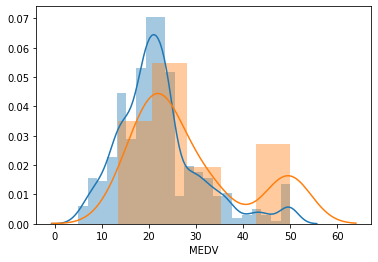

In [12]:
sns.distplot(bostonFar['MEDV'])
sns.distplot(bostonNear['MEDV'])

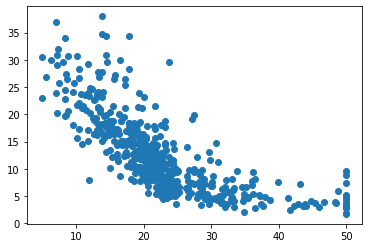

In [13]:
plt.scatter(x=bostonDF['MEDV'], y=bostonDF['LSTAT'])

T Test assumptions

1. Normality 

Show that they are largely normal

2. unequal sample sizes, should check for The Assumption of Homogeneity of Variance

In [17]:
bostonNear['CHAS'].shape

(35,)

In [16]:
bostonFar['CHAS'].shape

(471,)

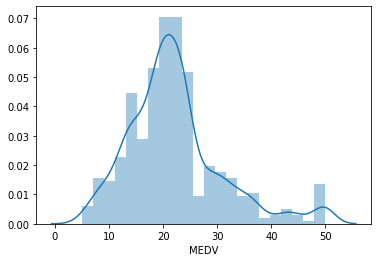

In [20]:
sns.distplot(bostonFar['MEDV'])


QQ plot https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm  - 45 degree reference line

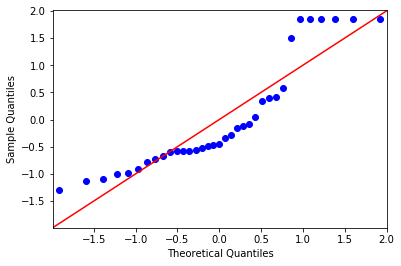

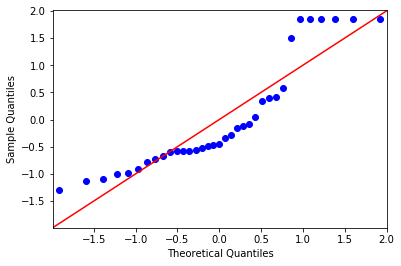

In [40]:
statmod.qqplot(bostonNear['MEDV'], fit=True, line='45')

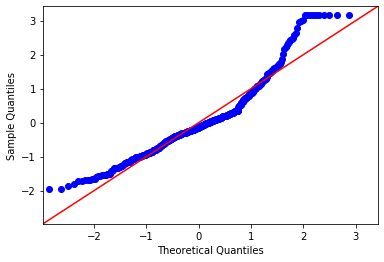

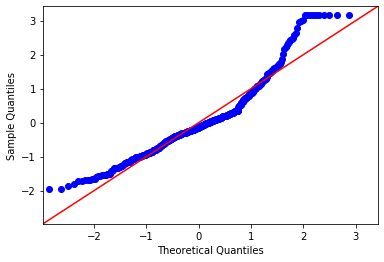

In [39]:
statmod.qqplot(bostonFar['MEDV'], fit=True, line='45')

In [ ]:
stats.shapiro(bostonNear['MEDV'])

In [33]:
stats.shapiro(bostonFar['MEDV'])

(0.9282605051994324, 3.113930960958397e-14)

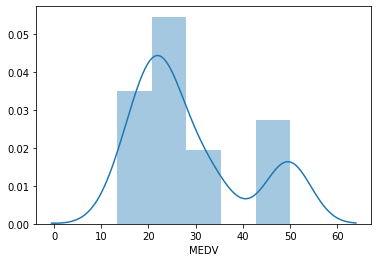

In [27]:
sns.distplot(bostonNear['MEDV'])

In [28]:
stats.levene(bostonFar['MEDV'], bostonNear['MEDV'])

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [29]:
stats.bartlett(bostonFar['MEDV'], bostonNear['MEDV'])

BartlettResult(statistic=6.3155412473961325, pvalue=0.011968420559230059)

In [41]:
stats.mannwhitneyu(bostonFar['MEDV'], bostonNear['MEDV'])

MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)

In [43]:
stats.ttest_ind(bostonFar['MEDV'], bostonNear['MEDV'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Its easier to see in the qqplots, but both distributions are right skewed and similar shape, qqplot can also show the shape of the distribution 

They are both right tailed http://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html

The histograms and qqplot both show that they have the same shape

https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm